# Assignment Book Recommender System

### 1. Data Preparation

### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1.1 - Read datasets

In [3]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

### 1.2 - List the datasets

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### 1.3 Checking the Shape of datasets

In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


### 1.4 Checking the null values in the datasets

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### 1.5 Checking duplicated values in the datasets

In [11]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


### 1.6 Merge datasets

In [15]:
ratings_with_book_titles = ratings.merge(books,on='ISBN')
#ratings_with_book_titles.head()

In [16]:
ratings_with_book_titles.drop(columns=["ISBN","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

In [17]:
complete_df = ratings_with_book_titles.merge(users.drop("Age", axis=1), on="User-ID")
#complete_df.head()

### 1.7 Splits location strings by commas

In [67]:
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip()

In [68]:
complete_df.head()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,usa
3,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,usa
4,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,usa


In [18]:
# Calculate mean rating of all books
complete_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head()

Book-Title
Film Is: The International Free Cinema                                                                                                    10.0
More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy    10.0
Jo's Boys : From the Original Publisher                                                                                                   10.0
The Vanished Priestess : An Annie Szabo Mystery                                                                                           10.0
Game and Hunting                                                                                                                          10.0
Name: Book-Rating, dtype: float64

In [19]:
complete_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head()

Book-Title
Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code              898
A Painted House                838
The Nanny Diaries: A Novel     828
Name: Book-Rating, dtype: int64

In [20]:
complete_df.groupby('Book-Title').count().info

<bound method DataFrame.info of                                                     User-ID  Book-Rating  \
Book-Title                                                                 
 A Light in the Storm: The Civil War Diary of A...        4            4   
 Always Have Popsicles                                    1            1   
 Apple Magic (The Collector's series)                     1            1   
 Ask Lily (Young Women of Faith: Lily Series, B...        1            1   
 Beyond IBM: Leadership Marketing and Finance f...        1            1   
...                                                     ...          ...   
Ã?Â?lpiraten.                                             2            2   
Ã?Â?rger mit Produkt X. Roman.                            4            4   
Ã?Â?sterlich leben.                                       1            1   
Ã?Â?stlich der Berge.                                     3            3   
Ã?Â?thique en toc                                       

In [21]:
# creating dataframe with 'rating' count values 
avg_ratings = pd.DataFrame(complete_df.groupby('Book-Title')['Book-Rating'].mean())  

#add another column called "num of ratings" that count the total rating
avg_ratings['num of ratings'] = pd.DataFrame(complete_df.groupby('Book-Title')['Book-Rating'].count()) 
  
avg_ratings.sort_values('num of ratings', ascending=False)

,Book-Rating,num of ratings
Book-Title,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.642539,898
A Painted House,3.231504,838
The Nanny Diaries: A Novel,3.530193,828
...,...,...
Real Love: The Truth About Finding Unconditional Love and Fulfilling Relationships,0.000000,1
Real Love: The Drawings for Sean,10.000000,1
"Real Love or Fake (Camfield Novel of Love, No 78)",5.000000,1


## Create histogram

<Axes: >

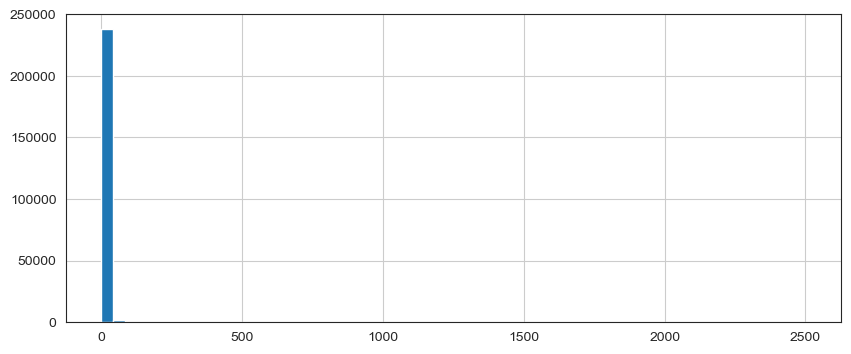

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 
 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
avg_ratings['num of ratings'].hist(bins = 60) 

<Axes: >

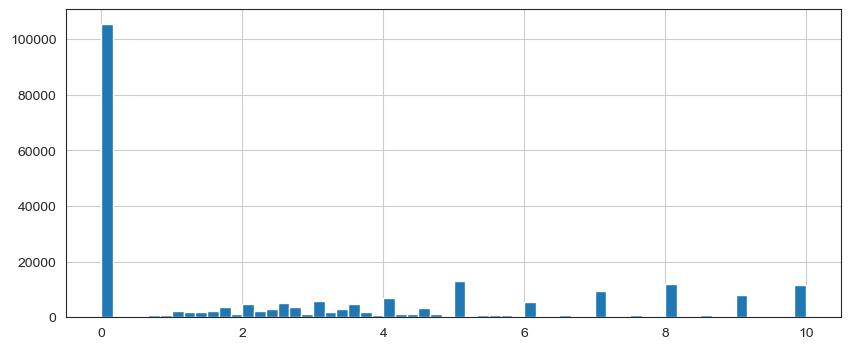

In [23]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
avg_ratings['Book-Rating'].hist(bins = 60) 

## Collaborative Filtering Based Recommender System

In [24]:
# Find the user who have more than 200 ratings
active_user = complete_df.groupby('User-ID')['Book-Rating'].count() > 200

active_user_id = active_user[active_user].index

In [26]:
# Filter ratings from active users
active_user_ratings = complete_df[complete_df['User-ID'].isin(active_user_id)]
#active_user_ratings

In [27]:
# Filter the book that have more than 50 ratings
filtered_books = active_user_ratings.groupby('Book-Title').count()['Book-Rating'] > 50

popular_books = filtered_books[filtered_books].index

In [28]:
final_ratings =  active_user_ratings[active_user_ratings['Book-Title'].isin(popular_books)]

#final_ratings

In [31]:
final_ratings.drop_duplicates()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
38,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,"strafford, missouri, usa"
39,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,"strafford, missouri, usa"
40,6543,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,"strafford, missouri, usa"
41,6543,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,"strafford, missouri, usa"
43,6543,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,"strafford, missouri, usa"
...,...,...,...,...,...,...,...,...
842419,72352,0,Heartbreaker,Linda Howard,2002,Mira,http://images.amazon.com/images/P/1551668874.0...,"samieira, pontevedra, spain"
842458,72352,10,Guardian Angel,Julie Garwood,1990,Pocket,http://images.amazon.com/images/P/0671670069.0...,"samieira, pontevedra, spain"
856993,4385,0,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,"albq, new mexico, usa"
857035,4385,10,The Runaway Jury,JOHN GRISHAM,1997,Dell,http://images.amazon.com/images/P/0440221471.0...,"albq, new mexico, usa"


In [32]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID', values='Book-Rating')
#pt

In [33]:
pt.fillna(0,inplace=True)
#pt

In [34]:
from sklearn.metrics.pairwise import cosine_similarity 

In [35]:
similarity_score = cosine_similarity(pt)

#similarity_score

In [36]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [37]:
recommend("Fine Things")

[['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Zoya',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440203856.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Message from Nam',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440209412.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg']]

In [17]:
!pip install scikit-surprise
import joblib

SyntaxError: invalid syntax (1177147677.py, line 2)

In [12]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define the rating scale
reader = Reader(rating_scale=(0, 10))

# Load the data into Surprise's dataset format
data = Dataset.load_from_df(complete_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

# Define the SVD algorithm
model = SVD()

# Train the algorithm on the training set
model.fit(train_set)

# Make predictions on the test set
predictions = model.test(test_set)

# Evaluate the model
accuracy.rmse(predictions)

ModuleNotFoundError: No module named 'surprise'

In [7]:
joblib.dump(model, 'book_recommender_model.joblib')

NameError: name 'book_recommender_model' is not defined